<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/019%20-%20Lesson%2019%20(Hunting%20Exoplanets%20In%20Space%20-%20Fast%20Fourier%20Transformation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 19: Hunting Exoplanets In Space - Fast Fourier Transformation

### Teacher-Student Activities

In the previous class, we learnt data normalisation, why to normalise data and how to normalise data. Also, we normalised both the `exo_train_df` and `exo_test_df` DataFrames using the mean normalisation method.

In this class, we will learn how to apply Fast Fourier Transformation.

Let's run all the codes in the code cells that we have already covered in the previous classes and begin this class from the **Activity 1: Fast Fourier Transformation** section. You too run the code cells until the first activity.


---

#### Loading The Datasets
Create a Pandas DataFrame every time you start the Jupyter notebook.

Dataset links (don't click on them):

1. Train dataset

  https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv

2. Test dataset

  https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv

In [ ]:
# Load both the training and test datasets.
import numpy as np
import pandas as pd


exo_train_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv')
exo_test_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv')

In [ ]:
# The shapes of the 'exo_train_df' and 'exo_test_df' DataFrames.
print(exo_train_df.shape)
exo_test_df.shape

(5087, 3198)


(570, 3198)

In the previous classes, we have already checked the datasets don't have a missing value. So, we can skip that part.

---

#### Data Normalisation

Normalise data using the mean normalisation method.

In [ ]:
# Function for mean normalisation.
def mean_normalise(series):
  norm_series = (series - series.mean()) / (series.max() - series.min())
  return norm_series

In [ ]:
# Applying the 'mean_normalise()' function horizontally on the training DataFrame.
norm_train_df = exo_train_df.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_train_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,-0.109164,...,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,-0.105708,...,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,0.221536,...,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,0.513506,...,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,-0.350022,...,-0.212262,-0.141752,-0.141752,-0.125499,-0.157156,-0.155246,-0.141038,-0.135528,-0.145458,-0.181590


In [ ]:
# Inserting the 'LABEL' column to the 'norm_train_df' DataFrame.
norm_train_df.insert(loc=0, column='LABEL', value=exo_train_df['LABEL'])
norm_train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,...,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,2,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,...,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,...,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,2,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,...,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,2,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,...,-0.212262,-0.141752,-0.141752,-0.125499,-0.157156,-0.155246,-0.141038,-0.135528,-0.145458,-0.181590


In [ ]:
# Applying the 'mean_normalise()' function on the testing DataFrame.
norm_test_df = exo_test_df.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_test_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,...,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,...,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,...,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,...,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,...,-0.006247,-0.016795,-0.001531,0.001095,-0.004439,-0.027127,-0.025421,-0.016852,-0.020089,0.002564


In [ ]:
# Inserting the 'LABEL' column to the 'norm_test_df' DataFrame.
norm_test_df.insert(loc=0, column='LABEL', value=exo_test_df['LABEL'])
norm_test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,...,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,2,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,...,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,...,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,2,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,...,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,2,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,...,-0.006247,-0.016795,-0.001531,0.001095,-0.004439,-0.027127,-0.025421,-0.016852,-0.020089,0.002564


---

#### Transpose Of A DataFrame


In [ ]:
# Transpose the 'exo_train_df' using the 'T' keyword.
exo_train_df.T

,0,1,2,3,4,5,6,7,8,9,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
LABEL,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34,238.77,-103.54,-265.91,...,125.57,7.45,475.61,-46.63,299.41,-91.91,989.75,273.39,3.82,323.28
FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96,262.16,-118.97,-318.59,...,78.69,10.02,395.50,-55.39,302.77,-92.97,891.01,278.00,2.09,306.36
FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30,277.80,-108.93,-335.66,...,98.29,6.87,423.61,-64.88,278.68,-78.76,908.53,261.73,-3.29,293.16
FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63,190.16,-72.25,-450.47,...,91.16,-2.82,376.36,-88.75,263.48,-97.33,851.83,236.99,-2.88,287.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLUX.3193,92.54,0.76,5.06,-12.67,-438.54,19.27,-0.44,95.30,4.53,3162.53,...,210.09,8.75,163.02,28.82,-74.95,151.75,-136.16,-3.47,-1.50,-25.33
FLUX.3194,39.32,-11.70,-11.80,-8.77,-399.71,-43.90,10.90,48.86,21.95,3398.28,...,3.80,-10.69,86.29,-20.12,-46.29,-24.45,38.03,65.73,-4.65,-41.31
FLUX.3195,61.42,6.46,-28.91,-17.31,-384.65,-41.63,-11.77,-10.62,26.94,3648.34,...,16.33,-9.54,13.06,-14.41,-3.08,-17.00,100.28,88.42,-14.55,-16.72
FLUX.3196,5.08,16.00,-70.02,-17.35,-411.79,-52.90,-9.25,-112.02,34.08,3671.97,...,27.35,-2.48,161.22,-43.35,-28.43,3.23,-45.64,79.07,-6.41,-14.09


---

#### Activity 1: Fast Fourier Transformation^^^

As discussed in the next class, as a next step, we need to apply the Fourier Transformation on our dataset.

**What is Fourier Transformation?**

To understand the Fourier Transformation concept, let's go back to the line plots that we created in the previous classes. Recall the line plot for the `star_0` Pandas series. The graph has a wave-like pattern with periodic downward peaks. As the value on the $x-axis$ increases, the `FLUX` values on the $y-axis$ periodically increase and decrease.


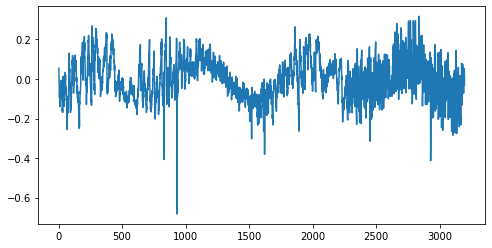

In [ ]:
# Student Action: Create a line plot for the first star in the 'norm_train_df' DataFrame.
import matplotlib.pyplot as plt
import numpy as np

star_0 = norm_train_df.iloc[0,1:]
plt.figure(figsize = (8,4))
plt.plot(np.arange(1,3198),star_0)
plt.show()

In [ ]:
star_0

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,-0.109164,...,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,-0.105708,...,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,0.221536,...,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,0.513506,...,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,-0.350022,...,-0.212262,-0.141752,-0.141752,-0.125499,-0.157156,-0.155246,-0.141038,-0.135528,-0.145458,-0.181590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-0.191318,-0.193261,-0.167219,-0.201251,-0.147500,-0.147940,-0.161208,-0.113139,-0.079547,-0.044654,...,0.233591,0.246987,0.264745,0.262344,0.263664,0.255216,-0.067690,-0.054037,-0.016964,0.012450
5083,0.419089,0.376920,0.384402,0.360187,0.318881,0.259377,0.250831,0.192365,0.206873,0.160536,...,-0.014922,-0.005672,-0.036191,-0.019765,-0.069301,-0.061755,0.012637,0.039222,-0.023097,0.011590
5084,0.132006,0.134256,0.126314,0.114239,0.135588,0.127862,0.122014,0.122971,0.114537,0.114981,...,-0.014526,-0.027738,-0.025210,0.013691,0.006355,-0.003129,0.030648,0.041723,0.037159,0.037335
5085,0.005570,0.002376,-0.007557,-0.006800,0.001582,-0.002867,0.005625,-0.001538,0.004573,0.010130,...,0.018567,-0.007446,-0.010899,-0.009994,-0.019613,-0.004252,-0.010068,-0.028346,-0.013317,-0.006191


So there is a clear fluctuation in the `FLUX` values which drops,

- whenever a planet comes between its star and the Kepler telescope while orbiting the star and

- whenever the planet goes behind the star (as observed by Kepler telescope) while orbiting the star

To visualise the phenomenon described above, watch a video by clicking on the link provided in the **Activities** section under the title **Transiting Exoplanet Light Curve**.


You may observe the fluctuations in the brightness level. However, we need to find out whether these fluctuations are periodic i.e. whether they are occuring after every fixed interval. If these fluctuations are periodic, then we can say that the star has at least one planet.

Thus, to identify whether increase or decrease in the brightness level is periodic or not, we will use **Fourier Transformation**. But before applying Fourier Transformation, let us try to understand certain terms.

---

**1. Frequency:**

When the planet completes one revolution around the star, one cycle completes. This cycle repeats after a fixed time interval.

E.g., Earth completes one revolution around the Sun in approximately 365.25 days so Earth's one cycle is 365.25 days long which repeats again and again. <br/>


<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C19/whj-earth-rotate-apt-c19.gif" height=400/>


The length of one cycle (in the unit of time) is called **frequency**.
In simple words, it means how often something happens.

It is calculated as

$$f = \frac{1}{T}$$

where
$T$
is time in seconds. The SI unit of frequency is **Hertz** denoted as **Hz**.

So, the Earth's frequency is the reciprocal of
$365.25$
days, i.e.,

$$f_{\text{Earth}} = \frac{1}{365.25} $$

$$f_{\text{Earth}}= \frac{1}{365.25 \times 24 \times 60 \times 60} \space \text{Hz}$$

$[ \because 1 \space \text{day}  = 24 \times 60 \times 60 = 86400 \space \text{seconds} ]$


**2. Amplitude:**

It is the peak value of a wave. The amplitude of a wave is the height from the center line to its peak.

<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C19/whj-graph-blue-apt-c19-01.png" height=400/>

---

**Why do we need to apply Fourier Transformation?**
---
Consider the following sine wave (sound wave):
<center>
<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C19/whj-radio-frequency-apt-c19.gif" height=300/>

<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C19/whj-graph-apt-c19-01.png" height=300/>

This red wave is a linear combination of two periodic waves.

<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C19/sum.png"/>

However, just by observing the time dependent data, it is difficult to identify how many periodic waves exists and what are the frequencies of those waves.

<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C19/graph.png" height=400/></center>


Thus, we will convert a signal from time domain to its corresponding frequency domain using Fourier transform, so that we can have a better analysis of that signal.

**The Fourier transformation converts time-dependent data into frequency-dependent data.**

<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C19/whj-time-frequency+domain-apt-c19-01.png" height=400/>


As you can see in the images above, first, we have a time-dependent data that is later converted into a frequency-dependent data.

There are two peaks at the numbers `30` and `45` on the  x−axis.  These two values are frequencies of the two periodic waves.

<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C19/whj-30ghz-45ghz-apt-c19.gif" height=400/>



Hence, by converting time dependent data into frequency dependent data, we can easily identify how many periodic signals exists and what are the frequencies of those signals.

Similarly, we can get the frequencies of the planets revolving around its star. Our predict model (Random Forest Classifier) can capture these frequencies while learning from the training data. Thus, allowing the prediction model to make accurate predictions.



---

#### Activity 2: The `np.fft.fft()` & `np.abs()` Functions

Let's apply Fourier transformation on the first star, i.e., `star_0` using the `np.fft.fft()` function and then make its line plot.

**Note:** The acronym `fft` in the `fft.fft()` function stands for Fast Fourier Transformation. It's just the name of the algorithm which applies Fourier transformation (a mathematical concept).

**Syntax:**

`np.fft.fft(a)` where `a` is the input array.

In [ ]:
# Teacher Action: Apply the 'fft.fft()' function on the 'star_0' Pandas series.
fft_star_0 = np.abs(np.fft.fft(star_0))
fft_star_0

array([6.00470566e-15, 2.27324760e+00, 3.57228832e+01, ...,
       3.39782358e+01, 3.57228832e+01, 2.27324760e+00])

The `fft.fft()` function returns an array of the transformed values. Note that we have applied another function too. It's `abs()` to get the absolute values of the values stored in the array.


**The Absolute Value**
---

The absolute values are usually calculated when the transformed values (after applying Fourier transformation) turn out to be complex numbers.

A **complex number** is a combination of a real number and an imaginary number.

For a general complex number,
$$z = a+bj$$
the absolute value is calculated as
$$|z| = \sqrt{a^2 + b^2}$$

where
$a, b$
are some real numbers and
$j = \sqrt{-1}$

The
$\sqrt{-1}$
is called **iota** and is often represented as
$i = \sqrt{-1}$
in many Math textbooks.

<center>
<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C19/whj-real-imaginary-apt-c19-01.png" height=400/></center>

 A multiple of $\sqrt{-1}$ is an imaginary number.

The absolute value of the complex number
$(2 + 3j)$ is $\sqrt{2^2 + 3^2} = \sqrt{13} = 3.605$

In Python, to find absolute value of a number, we use `np.abs()` function.


In [ ]:
# Student Action: Calculate the absolute value of the complex number, z = 2 + 3j.
abs(2 + 3j)

3.605551275463989



A complex number cannot be plotted on a real number line because it contains an imaginary part. Contrary to its name, a complex number reduces the complexity of calculations, especially in the problems related to geometry.  

---



Plotting Fourier Transformed values for `star_0`
--

Let's plot the Fourier transformed values for the `star_0` Pandas series.
- The X-axis will be the frequency axis.
- The Y-axis will have tranformed FFT values i.e `fft_star_0` array.

To get sample frequencies for X-axis, we will use `fft.fftfreq()` function of the `numpy` module.

**The `fft.fftfreq()` function:**

- It generates all the necessary Fourier Transform sample frequencies.

- It returns an array of the frequency bin centers.
- **Syntax:** `np.fft.fftfreq(n)` where `n` is the number of frequencies to be generated for plotting `n` Fourier Transformed values.

<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C19/whj-x+axis-yaxis-apt-c19-01.png" />


Now, let's find out the frequencies for the `star_0` Pandas series using `fft.fftfreq()` function.

In [ ]:
# Student Action: Apply the 'fft.fftfreq()' function on 'len(star_0)' to get the frequencies of the 'star_0' Pandas series.
frequency = np.fft.fftfreq(len(star_0))
frequency

array([ 0.        ,  0.00031279,  0.00062559, ..., -0.00093838,
       -0.00062559, -0.00031279])

Note that the above frequency array generated using `fft.fftfreq()` function will not only be used for plotting `star_0` but for all stars. This is because, the `fft.fftfreq()` function output depends on the length of the array/series and the pandas series of all the stars have same length.

Now, let's plot the Fourier transformed values with the frequency values for the `star_0` Pandas series.

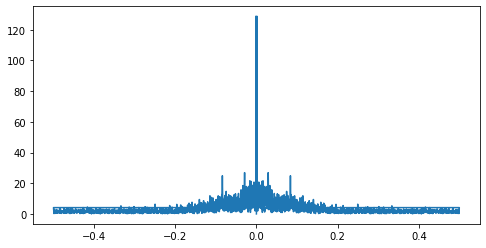

In [ ]:
# Student Action: Create a line plot between the 'fft_star_0' and 'freq' values.
plt.figure(figsize = (8,4))
plt.plot(frequency, fft_star_0)
plt.show()


The 5 tall peaks in the above graph:

1. At `-0.08` (approx)

2. At `-0.03` (approx)

3. At `0.00`

4. At `0.03` (approx)

4. At `0.08` (approx)

Notice that the above plot is symmetric. So, either we can consider the left-half of the graph or the right-half. They both mean the same thing. Also, there is a huge spike close to `0`. It denotes that `star_0` has a frequency very close to `0`.

The above graph has been plotted for 3197 values.
If we plot the above graph for the first 10 values only, then we will be able to observe the peak very closely.

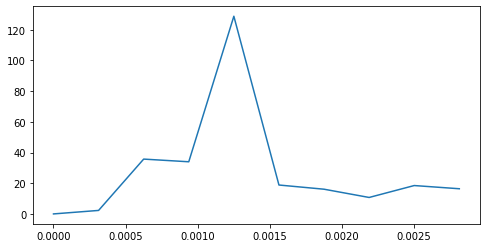

In [ ]:
# Student Action: Plot a line plot between the 'fft_star_0' and 'freq' values for the first 10 values only.
plt.figure(figsize = (8,4))
plt.plot(frequency[:10], fft_star_0[:10])
plt.show()

As you can see, the peak lies at some point between `0.001` and `0.0015`, i.e. at `0.00125`.



Applying FFT on `exo_train_df` Dataset
--

Now, let's apply the Fourier Transformation on the entire `exo_train_df` dataset. For this purpose, we will have to create a function to apply the `fft.fft()` function on an entire DataFrame using the `apply()` function.

Let's name it `fast_fourier_transform()`. This function will accept a pandas series `star` as input. It should do two actions:

1. Transform a Pandas series using the `fft.fft()` function.

2. Calculate the absolute value of each item in the series.

In [ ]:
# Student Action: Create a function and name it 'fast_fourier_transformation()' to apply Fast Fourier Transformation on the DataFrames.
def fast_fourier_transformation(star):
  fft_star = np.fft.fft(star, n = len(star))
  return np.abs(fft_star)


This time we will apply the `fast_fourier_transform()` function vertically.

To apply Fast Fourier Transformation, we need to follow three steps:


<img src="https://curriculum.whitehatjr.com/APT+Asset/APT+C18/whj-steps-gif-apt-c19.gif" />



**Note:** We don't want to transform the `LABEL` values. We want to transform the `FLUX` values only.

In [ ]:
# Teacher Action: Apply the 'fast_fourier_transform' function on the transposed 'norm_train_df' DataFrame.
x_train_fft = norm_train_df.iloc[:,1:].T.apply(fast_fourier_transformation, axis = 0).T
x_train_fft
# Here, we first take the transpose of the DataFrame and then apply the fast_fourier_transform vertically. So axis = 0 is specified here.

# After transforming the 'FLUX' values, we again take the transpose.

# Print the first five rows of the transformed DataFrame.


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,6.004706e-15,2.273248,35.722883,33.978236,128.816503,18.835061,16.101795,10.722037,18.488302,16.400976,...,1.920231,16.400976,18.488302,10.722037,16.101795,18.835061,128.816503,33.978236,35.722883,2.273248
1,4.094300e-15,30.299298,36.918808,38.376852,22.149931,33.282191,27.734204,11.862346,14.001221,14.221386,...,11.833992,14.221386,14.001221,11.862346,27.734204,33.282191,22.149931,38.376852,36.918808,30.299298
2,3.742374e-15,66.809870,19.498262,170.268810,48.413391,88.178733,57.407061,38.684283,10.503268,46.482585,...,22.681374,46.482585,10.503268,38.684283,57.407061,88.178733,48.413391,170.268810,19.498262,66.809870
3,8.024386e-15,19.369720,52.151962,108.097894,100.659024,269.416639,77.435861,71.256558,54.895479,33.335462,...,26.711804,33.335462,54.895479,71.256558,77.435861,269.416639,100.659024,108.097894,52.151962,19.369720
4,4.881195e-15,113.576655,51.382781,146.597215,148.627668,103.842855,116.738548,28.957862,36.451207,69.375686,...,4.923027,69.375686,36.451207,28.957862,116.738548,103.842855,148.627668,146.597215,51.382781,113.576655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,6.596257e-15,164.078267,31.693115,36.567491,14.780197,24.286227,33.728073,12.924156,2.112433,5.490516,...,23.175561,5.490516,2.112433,12.924156,33.728073,24.286227,14.780197,36.567491,31.693115,164.078267
5083,7.160723e-15,36.092850,33.641801,34.191799,20.803385,23.107118,14.243073,23.925287,6.711884,1.857337,...,3.518787,1.857337,6.711884,23.925287,14.243073,23.107118,20.803385,34.191799,33.641801,36.092850
5084,2.286763e-15,2.691374,8.891379,3.432605,5.804678,10.414170,2.301902,7.152522,1.949081,5.354658,...,4.384586,5.354658,1.949081,7.152522,2.301902,10.414170,5.804678,3.432605,8.891379,2.691374
5085,2.288783e-16,3.667483,5.134361,7.035718,1.699144,1.261056,3.103313,1.659278,0.564607,2.247017,...,2.537612,2.247017,0.564607,1.659278,3.103313,1.261056,1.699144,7.035718,5.134361,3.667483


---

#### Activity 3: The `xlabel()` & `ylabel()` Functions

Now, let's plot the line plots for the stars `34` to `40` to see observe the frequency variations.
- The stars in the rows `34` to `36` are the ones having a planet
- The stars beyond the row `37` are the ones not having a planet.

Since we are going to plot 7 graphs in one go, use `for` loop and label their $x-\text{axis}$ using the `xlabel()` function and $y-\text{axis}$ using the `ylabel()` function of the `matplotlib.pyplot` module.

**Note**: The `xlabel()` and `ylabel()` functions only accept string values.

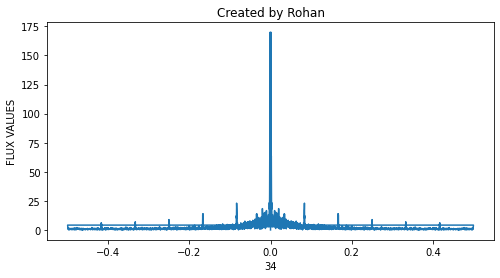

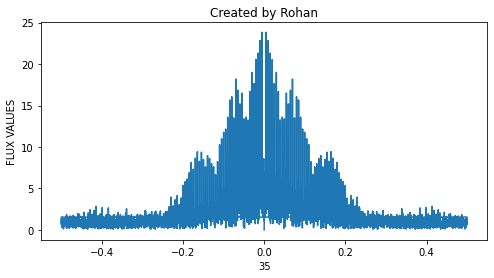

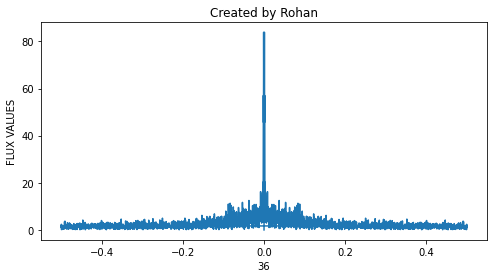

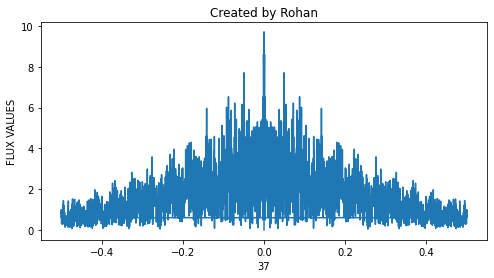

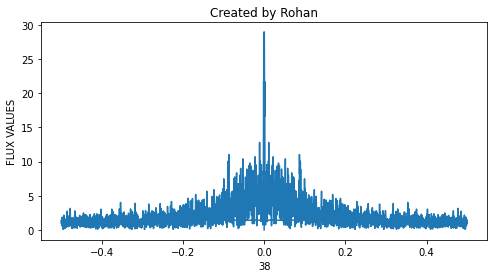

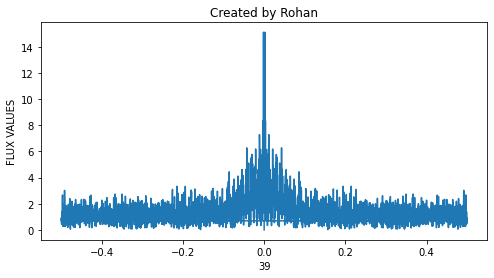

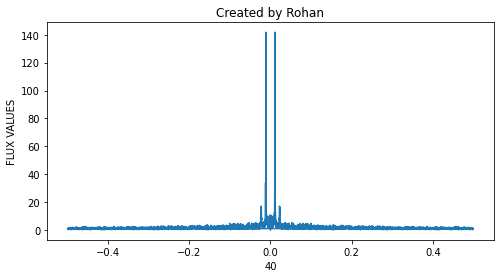

In [ ]:
# Teacher Action: Create line plots for the transformed Pandas series for the stars 34 to 41 in the 'x_fft_train' DataFrame.
for i in range(34,41):
  plt.figure(figsize = (8,4) )
  plt.title('Created by Rohan')
  plt.plot(frequency, x_train_fft.iloc[i,:])
  plt.xlabel(str(i))
  plt.ylabel('FLUX VALUES')
  plt.show()

The prediction model later, when deployed, should look for the different frequency pattern for different stars. Based on these patterns, it should classify whether a star has a planet or not.

Now, you apply the `fast_fourier_transform()` function on the `norm_test_df` `FLUX` values only. Before and after applying this function, take the transpose of the DataFrame.

In [ ]:
from pandas.core.arrays.numeric import T
# Student Action: Apply the 'fast_fourier_transform()' function on the transposed 'norm_test_df' DataFrame.
fast_fourier_transformation(norm_test_df)
fft_x_test = norm_test_df.iloc[:,1:].T.apply(fast_fourier_transformation, axis = 0).T
fft_x_test.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,8.950904e-16,23.184733,40.545472,17.994173,13.772498,16.594294,17.532422,8.094149,8.045917,9.549431,...,7.981027,9.549431,8.045917,8.094149,17.532422,16.594294,13.772498,17.994173,40.545472,23.184733
1,8.965352e-15,135.637702,42.680618,28.017660,17.672923,16.099550,62.999485,27.005547,26.735149,29.708628,...,9.883983,29.708628,26.735149,27.005547,62.999485,16.099550,17.672923,28.017660,42.680618,135.637702
2,1.369225e-14,101.624620,26.553454,11.634754,11.720122,46.153088,23.677302,22.208643,14.393021,3.278532,...,7.742408,3.278532,14.393021,22.208643,23.677302,46.153088,11.720122,11.634754,26.553454,101.624620
3,2.373386e-15,37.305651,20.537365,5.108229,16.309293,20.286675,18.969927,6.010526,8.763040,6.370417,...,16.668561,6.370417,8.763040,6.010526,18.969927,20.286675,16.309293,5.108229,20.537365,37.305651
4,6.684428e-15,7.138386,11.941614,12.808132,27.841397,39.681676,17.985758,30.233859,14.800046,8.501530,...,5.167375,8.501530,14.800046,30.233859,17.985758,39.681676,27.841397,12.808132,11.941614,7.138386


Now, you create the line plots for the stars in the rows `3 to 7`  in the transformed test DataFrame. Also, label the $x-axis$ with the row number.

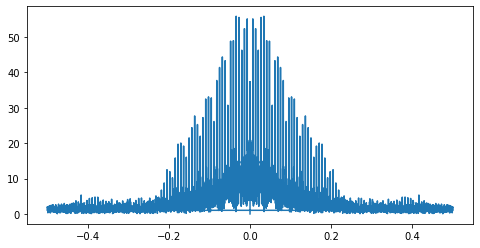

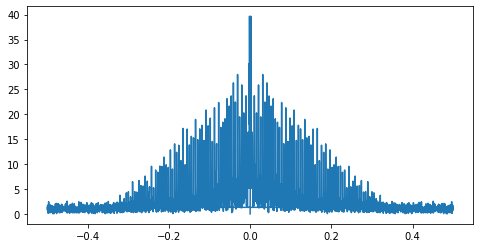

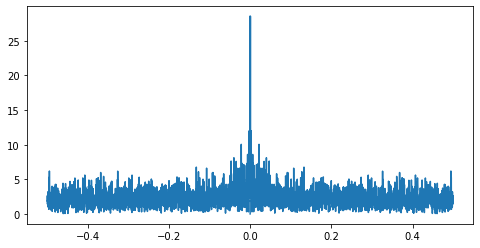

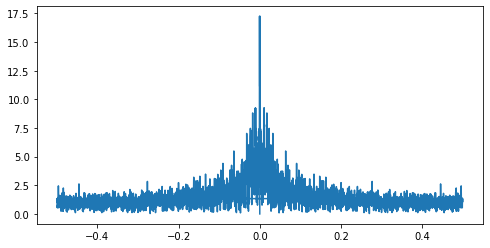

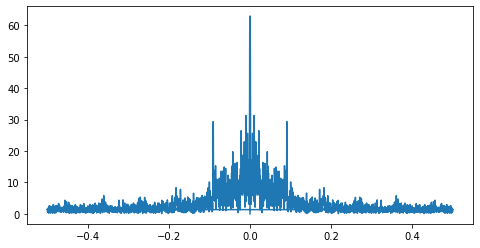

In [ ]:
# Student Action: Plot the line plots for the stars in the rows '3' to '7'  in the transformed test DataFrame.
for i in range(3,8):
  plt.figure(figsize = (8,4))
  plt.plot(frequency,fft_x_test.iloc[i,:])
  plt.show()

Now that we have applied Fourier transformation, our prediction model should be able to recognise the different frequency patterns for different stars and hopefully should be able to classify the stars correctly as required.

In the next class, we will how to manually synthesize data to have the equal number of class `1` and class `2` values in the `exo_train_df` DataFrame. Right now there are only 37 class `2` and 5050 class 1 values because of which the `exo_train_df` DataFrame is highly imbalanced.

---

### **Project**

You can now attempt the **Applied Tech. Project 19 - Fast Fourier Transformation** on your own.


**Applied Tech. Project 19 - Fast Fourier Transformation:** https://colab.research.google.com/drive/1RZuox5mDR-DH17YiNiuBjLcDxHdbGMAD

---